In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets.embed import embed_minimal_html
import gmplot
from IPython.display import display

import gmaps

# Import API key
g_key = ""

df = pd.read_csv("../cleaned_data_09_19.csv")

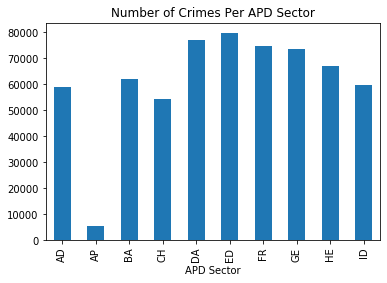

In [2]:
df['APD Sector'].replace({"HENRY":"HE", "IDA":"ID"}, inplace=True)
#renamed_df = df.rename(columns={"APD Sector": "APD_Sector"})
austin_crime = df[(df["APD Sector"] != "88") & (df["APD Sector"] != "UT")]
apd_grouped = austin_crime.groupby(["APD Sector"])
apd_counts = apd_grouped['Highest Offense Description'].count()
apd_df = pd.DataFrame(apd_counts)
apd_plot = apd_df.plot(kind='bar', title='Number of Crimes Per APD Sector', legend =False).get_figure()
apd_plot.savefig('apdsector.png')

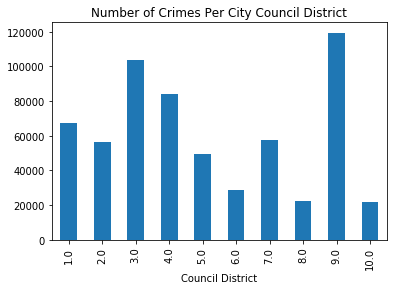

In [3]:
df["Council District"].value_counts()
district_grouped = df.groupby(["Council District"])
district_counts = district_grouped['Highest Offense Description'].count()
district_df = pd.DataFrame(district_counts)
district_plot = district_df.plot(kind='bar', title='Number of Crimes Per City Council District', legend=False).get_figure()
district_plot.savefig('districts.png')

In [4]:
df["Census Tract"].value_counts().head(20)

11.00    58475
9.02     15914
23.04    10296
18.23     9942
18.13     9615
18.49     8809
24.21     8630
23.18     8299
21.05     7845
18.06     7804
23.08     7592
13.07     7143
18.12     7138
13.05     6985
12.00     6760
24.02     6524
23.16     6261
15.03     6134
18.20     5961
18.04     5882
Name: Census Tract, dtype: int64

In [5]:
df['Zip Code'].value_counts().head(5)


78701.0    63327
78741.0    53630
78753.0    49507
78704.0    44606
78758.0    41764
Name: Zip Code, dtype: int64

In [6]:
df

,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date,Occurred Time,Location Type,Address,Zip Code,Council District,APD Sector,Census Tract,Clearance Status,Clearance Date,Category Description,Latitude,Longitude
0,CHILD CUSTODY INTERFERE,2001,N,2019-04-13,0,RESIDENCE / HOME,9500 DESSAU RD,78753.0,4.0,ED,18.33,NaN,NaN,NaN,30.352493,-97.675258
1,RUNAWAY CHILD,4100,N,2019-04-13,23,OTHER / UNKNOWN,3708 S 2ND ST,78704.0,3.0,DA,13.07,NaN,NaN,NaN,30.230056,-97.771030
2,CRIMINAL TRESPASS,2716,N,2019-04-13,1805,DEPARTMENT / DISCOUNT STORE,1030 NORWOOD PARK BLVD,78753.0,4.0,ID,18.13,C,4/13/19,NaN,30.339153,-97.691169
3,POCKET PICKING,605,N,2019-04-13,100,BAR / NIGHT CLUB,403 E 6TH ST,78701.0,9.0,GE,11.00,NaN,NaN,Theft,30.266787,-97.739181
4,THEFT BY SHOPLIFTING,607,N,2019-04-13,1050,LIQUOR STORE,8311 RESEARCH BLVD SVRD NB,78758.0,4.0,ED,18.05,NaN,NaN,Theft,30.356603,-97.715282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613431,PUBLIC INTOXICATION,2300,N,2009-01-01,627,STREETS / HWY / ROAD / ALLEY,1300 MC KIE CV,78752.0,4.0,ID,18.12,C,2/20/09,NaN,30.330025,-97.692291
613432,DWI,2100,N,2009-01-01,200,STREETS / HWY / ROAD / ALLEY,E BEN WHITE BLVD EB / E RIVERSIDE DR,78741.0,3.0,HE,23.12,C,1/5/09,NaN,30.218285,-97.690494
613433,THEFT BY SHOPLIFTING,607,N,2009-01-01,1529,CONVENIENCE STORE,8557 RESEARCH BLVD SVRD NB,78758.0,4.0,ED,18.05,C,1/6/09,Theft,30.361135,-97.716606
613434,POSS OF DRUG PARAPHERNALIA,1818,N,2009-01-01,2343,STREETS / HWY / ROAD / ALLEY,S CONGRESS AVE / RADAM LN,78745.0,3.0,DA,24.03,C,1/6/09,NaN,30.221365,-97.764831


In [7]:
gmaps.configure(api_key=g_key)
locations = df[["Latitude", "Longitude"]]
fig = gmaps.figure()
heatmap_layer = gmaps.heatmap_layer(locations)
heatmap_layer.max_intensity = 100
heatmap_layer.point_radius = 2
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [8]:
#embed_minimal_html('heatmap_austin.html', views=[fig])

In [9]:
riverside_crime = df[(df['Zip Code'] == 78741.0) | (df['Zip Code'] == 78704.0)]
gmaps.configure(api_key=g_key)
locations = riverside_crime[["Latitude", "Longitude"]]
fig = gmaps.figure()
heatmap_layer = gmaps.heatmap_layer(locations)
heatmap_layer.max_intensity = 100
heatmap_layer.point_radius = 5
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [10]:
#embed_minimal_html('heatmap_riverside.html', views=[fig])

In [11]:
dt_crime = df[(df['Zip Code'] == 78701.0)]
gmaps.configure(api_key=g_key)
locations = dt_crime[["Latitude", "Longitude"]]
fig1 = gmaps.figure()
heatmap_layer = gmaps.heatmap_layer(locations)
heatmap_layer.max_intensity = 100
heatmap_layer.point_radius = 5
fig1.add_layer(heatmap_layer)
fig1

Figure(layout=FigureLayout(height='420px'))

In [12]:
#embed_minimal_html('heatmap_dt.html', views=[fig])

In [13]:
lamar_crime = df[(df['Zip Code'] == 78753.0) | (df['Zip Code'] == 78758.0)]
gmaps.configure(api_key=g_key)
locations = lamar_crime[["Latitude", "Longitude"]]
fig2 = gmaps.figure()
heatmap_layer = gmaps.heatmap_layer(locations)
heatmap_layer.max_intensity = 100
heatmap_layer.point_radius = 5
fig2.add_layer(heatmap_layer)
fig2

Figure(layout=FigureLayout(height='420px'))

In [14]:
#embed_minimal_html('heatmap_lamar.html', views=[fig])